<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [36]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [37]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [60]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
bathrooms_numeric                                 123
Length: 72, dtype: int64

In [61]:
#Calculamos el numero total de la población "n"
Mexico['bathrooms_text']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: bathrooms_text
Non-Null Count  Dtype 
--------------  ----- 
26370 non-null  object
dtypes: object(1)
memory usage: 206.4+ KB


In [62]:
columna_como_string = Mexico['bathrooms_text'].astype(str)

In [63]:
columna_solo_numeros = columna_como_string.replace(r'[^0-9\.]', '', regex=True)

In [64]:
Mexico['bathrooms_numeric'] = pd.to_numeric(columna_solo_numeros, errors='coerce')

In [65]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['bathrooms_numeric'].max()
Min=Mexico['bathrooms_numeric'].min()
Limites= [Min, Max]
Limites

[0.0, 49.0]

In [66]:
#Calculamos el rango R
R=Max-Min
R

49.0

In [67]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [68]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

3.12504391563733

**Creación de Categorias a partir de clases**

In [69]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 49.1, 16)
intervalos

array([-0.1 ,  3.18,  6.46,  9.74, 13.02, 16.3 , 19.58, 22.86, 26.14,
       29.42, 32.7 , 35.98, 39.26, 42.54, 45.82, 49.1 ])

In [70]:
#Creamos las categorías 
categorias= ["Categoría1 (0-3.18 bathrooms_numeric)", "Categoría2 (3.19-6.46 bathrooms_numeric)","Categoría3 (6.47-9.74 bathrooms_numeric)", "Categoría4 (9.75-13 bathrooms_numeric)",
             "Categoría5 (13.1-16.3 bathrooms_numeric)", "Categoría6 (16.4-19.5 bathrooms_numeric)","Categoría7 (19.6-22.8 bathrooms_numeric)", "Categoría8 (22.9-26.1 bathrooms_numeric)", "Categoría9 (26.2-29.4 bathrooms_numeric)", "Categoría10 (29.5-32.7 bathrooms_numeric)","Categoría11 (32.8-35.9 bathrooms_numeric)", "Categoría12 (36-39.2 bathrooms_numeric)",
             "Categoría13 (39.3-42.5 bathrooms_numeric)", "Categoría14 (42.6-45.8 bathrooms_numeric)","Categoría15 (45.9-49.1 bathrooms_numeric)"
             ]

In [71]:
#Finalmente creamos las categorías en la columna numérica
Mexico['bathrooms_numeric']=pd.cut(x= Mexico['bathrooms_numeric'], bins=intervalos, labels= categorias)
Mexico['bathrooms_numeric']

0           Categoría1 (0-3.18 bathrooms_numeric)
1        Categoría2 (3.19-6.46 bathrooms_numeric)
2           Categoría1 (0-3.18 bathrooms_numeric)
3           Categoría1 (0-3.18 bathrooms_numeric)
4           Categoría1 (0-3.18 bathrooms_numeric)
                           ...                   
26396       Categoría1 (0-3.18 bathrooms_numeric)
26397       Categoría1 (0-3.18 bathrooms_numeric)
26398       Categoría1 (0-3.18 bathrooms_numeric)
26399       Categoría1 (0-3.18 bathrooms_numeric)
26400       Categoría1 (0-3.18 bathrooms_numeric)
Name: bathrooms_numeric, Length: 26401, dtype: category
Categories (15, object): ['Categoría1 (0-3.18 bathrooms_numeric)' < 'Categoría2 (3.19-6.46 bathrooms_numeric)' < 'Categoría3 (6.47-9.74 bathrooms_numeric)' < 'Categoría4 (9.75-13 bathrooms_numeric)' ... 'Categoría12 (36-39.2 bathrooms_numeric)' < 'Categoría13 (39.3-42.5 bathrooms_numeric)' < 'Categoría14 (42.6-45.8 bathrooms_numeric)' < 'Categoría15 (45.9-49.1 bathrooms_numeric)']

In [72]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['bathrooms_numeric'].value_counts().reset_index()
Tabla_freq

bathrooms_numeric  count
0       Categoría1 (0-3.18 bathrooms_numeric)  25302
1    Categoría2 (3.19-6.46 bathrooms_numeric)    828
2    Categoría3 (6.47-9.74 bathrooms_numeric)     90
3      Categoría4 (9.75-13 bathrooms_numeric)     43
4    Categoría5 (13.1-16.3 bathrooms_numeric)     10
5    Categoría7 (19.6-22.8 bathrooms_numeric)      2
6   Categoría15 (45.9-49.1 bathrooms_numeric)      2
7    Categoría6 (16.4-19.5 bathrooms_numeric)      1
8    Categoría8 (22.9-26.1 bathrooms_numeric)      0
9    Categoría9 (26.2-29.4 bathrooms_numeric)      0
10  Categoría10 (29.5-32.7 bathrooms_numeric)      0
11  Categoría11 (32.8-35.9 bathrooms_numeric)      0
12    Categoría12 (36-39.2 bathrooms_numeric)      0
13  Categoría13 (39.3-42.5 bathrooms_numeric)      0
14  Categoría14 (42.6-45.8 bathrooms_numeric)      0

In [73]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

bathrooms_numeric  count
0      Categoría1 (0-3.18 bathrooms_numeric)  25302
1   Categoría2 (3.19-6.46 bathrooms_numeric)    828
2   Categoría3 (6.47-9.74 bathrooms_numeric)     90
3     Categoría4 (9.75-13 bathrooms_numeric)     43
4   Categoría5 (13.1-16.3 bathrooms_numeric)     10
5   Categoría7 (19.6-22.8 bathrooms_numeric)      2
6  Categoría15 (45.9-49.1 bathrooms_numeric)      2
7   Categoría6 (16.4-19.5 bathrooms_numeric)      1

In [74]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('bathrooms_numeric')
Filtro_index

count
bathrooms_numeric                               
Categoría1 (0-3.18 bathrooms_numeric)      25302
Categoría2 (3.19-6.46 bathrooms_numeric)     828
Categoría3 (6.47-9.74 bathrooms_numeric)      90
Categoría4 (9.75-13 bathrooms_numeric)        43
Categoría5 (13.1-16.3 bathrooms_numeric)      10
Categoría7 (19.6-22.8 bathrooms_numeric)       2
Categoría15 (45.9-49.1 bathrooms_numeric)      2
Categoría6 (16.4-19.5 bathrooms_numeric)       1

Text(0, 0.5, 'Frecuencia')

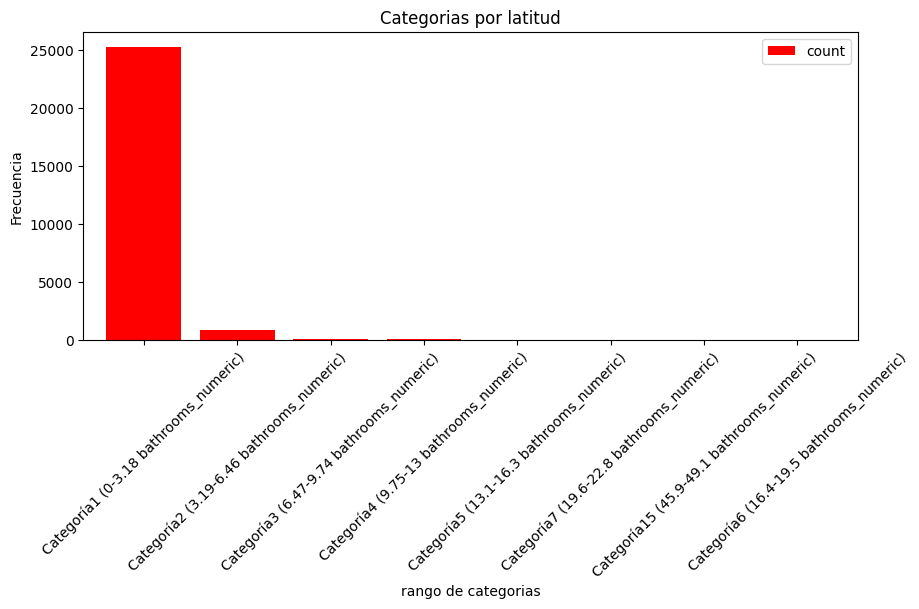

In [75]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')